# 3.5 뉴스 기사 분류 : 다중 분류 문제

- 다중 분류 : 클래스가 많은 경우  
  - 단일 레이블 다중 분류 : 각 데이터 포인트가 정확히 하나의 범주로 분류  
  - 다중 레이블 다중 분류 : 각 데이터 포인트가 여러 개의 범주에 속할 경우  

### 3.5.1 로이터 데이터셋

- 로이터 데이터셋은 1986년에 로이터에서 공개한 <u>짧은 뉴스 기사와 토픽의 집합</u>이다. 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋이다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있다. 
- 케라스에 포함되어 있다.

In [1]:
# 로이터 데이터셋 로드
from keras.datasets import reuters

# 데이터에서 가장 자주 등장하는 단어 1만 개로 제한
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) 

Using TensorFlow backend.
C:\Users\dldms\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dldms\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dldms\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dldms\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10] # 정수 리스트(단어 인덱스)

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
# 로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # 0,1,2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다.

557056/550378 [==============================] - 2s 3us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
# 샘플에 연결된 레이블은 토픽의 인덱스로 0과 45 사이의 정수이다.
train_labels[10]

3

### 3.5.2 데이터 준비

In [2]:
# 데이터 -> 벡터 변환
# 데이터 인코딩

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 -> 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 -> 벡터 변환

레이블을 벡터로 바꾸는 방법은 2가지가 있다.  
1. 레이블의 리스트를 정수 텐서로 변환  
2. **원-핫 인코딩 사용**  
   - 범주형 데이터에 널리 사용되기 때문에 범주형 인코딩이라고도 부른다.

In [3]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

- train_data와 test_data는 파이썬 리스트의 넘파이 배열이기 때문에 to_categorical() 함수를 사용하지 못한다.

In [15]:
print(len(x_train))
print(len(x_test))
print(len(one_hot_train_labels))
print(len(one_hot_test_labels))

8982
2246
8982
2246


- x_train과 x_test의 크기는 각각 (8982, 10000), (2246, 10000)이 되고 one_hot_train_labels와 one_hot_test_labels의 크기는 각각 (8982, 46), (2246, 46)이 된다.

In [4]:
# 내장 함수
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 3.5.3 모델 구성

이전 문제와 비슷해 보이지만 달라진 점은 출력 클래스의 개수가 2에서 46개로 늘어났다는 점이다. 즉, 출력 공간의 차원이 훨씬 커졌다.


이전에 사용했던 것처럼 Dense 층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사용할 수 있다. 한 층이 분류 문제에 필요한 일부 정보를 누락하면 그 다음 층에서 이를 복원할 방법이 없다. 각 층이 잠재적으로 정보의 병목이 될 수 있다. 이전 예제에서 16차원을 가진 중간층을 사용했찌만 16차원 공간은 46개의 클래스를 구분하기엔 너무 제약이 많을 것 같다. 따라서 좀 더 규모가 큰 층을 사용하겠다.

In [5]:
# 모델 정의
from keras import models
from keras import layers

model = models.Sequential() # Sequential 모델은 순차적으로 레이어 층을 더해주기 때문에 순차모델이라 불리고 만들기도 쉽다.
                            # 출처: https://saengjja.tistory.com/355 [생짜]
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

이 구조에서 주목해야 할 점이 두가지가 있다.


- 마지막 Dense 층의 크기가 46이다. <u>각 입력 샘플에 대해서 46차원의 벡터를 출력한다</u>는 뜻이다. 이 벡터의 각 원소(각 차원)는 각기 다른 출력 클래스가 인코딩된 것이다.  
- 마지막 층에 softmax 활성화 함수가 사용되었다. MNIST 예제에서 이런 방식을 보았다. <u>각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력한다. 즉, 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률이다.</u> 46개의 값을 모두 더하면 1이 된다.


이런 문제에 사용할 최선의 손실 함수는 **categorical_crossentropy**이다. 이 함수는 <u>두 확률 분포 사이의 거리를 측정</u>한다. 여기에서는 <u>네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리</u>이다. 두 분포 사이의 거리를 최소화하면 진짜 레이블에 가능한 가까운 출력을 내도록 모델을 훈련하게 된다.

In [6]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### 3.5.4 훈련 검증

In [7]:
# 검증 세트 준비
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
# 모델 훈련
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 517us/step - loss: 2.6966 - accuracy: 0.5016 - val_loss: 1.8059 - val_accuracy: 0.6200
Epoch 2/20
7982/7982 [==============================] - 2s 294us/step - loss: 1.4591 - accuracy: 0.6924 - val_loss: 1.3266 - val_accuracy: 0.7120
Epoch 3/20
7982/7982 [==============================] - 3s 344us/step - loss: 1.0639 - accuracy: 0.7767 - val_loss: 1.1321 - val_accuracy: 0.7650
Epoch 4/20
7982/7982 [==============================] - 3s 334us/step - loss: 0.8334 - accuracy: 0.8326 - val_loss: 1.0452 - val_accuracy: 0.7810
Epoch 5/20
7982/7982 [==============================] - 2s 312us/step - loss: 0.6616 - accuracy: 0.8631 - val_loss: 0.9695 - val_accuracy: 0.7940
Epoch 6/20
7982/7982 [==============================] - 2s 311us/step - loss: 0.5272 - accuracy: 0.8910 - val_loss: 0.9229 - val_accuracy: 0.8190
Epoch 7/20
7982/7982 [==============================] - 3s 350us/step - los

In [9]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

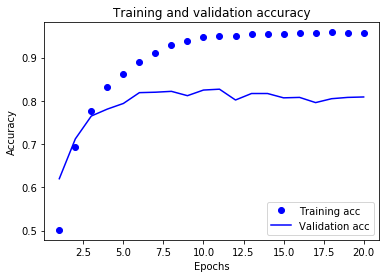

In [10]:
# 훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- 이 모델은 아홉 번째 에포크 이후에 과대적합이 시작된다. 아홉 번의 에포크로 새로운 모델을 훈련하고 테스트 세트에서 평가하겠다.
- 모델이 훈련 세트에서는 좋은 성능을 내지만 검증 세트에서는 낮은 성능을 내는 경우 **과대적합**이라고 한다. 예를 들어 모델이 훈련 세트에서는 좋은 성능을 내지만 검증 세트에서는 낮은 성능을 내는 경우가 있다.  
(출처: https://asthtls.tistory.com/1021 [포장빵의 IT])


In [13]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 406us/step - loss: 2.6742 - accuracy: 0.4615 - val_loss: 1.7693 - val_accuracy: 0.6270
Epoch 2/9
7982/7982 [==============================] - 2s 308us/step - loss: 1.4387 - accuracy: 0.6966 - val_loss: 1.3310 - val_accuracy: 0.6980
Epoch 3/9
7982/7982 [==============================] - 2s 278us/step - loss: 1.0629 - accuracy: 0.7737 - val_loss: 1.1591 - val_accuracy: 0.7620
Epoch 4/9
7982/7982 [==============================] - 2s 294us/step - loss: 0.8307 - accuracy: 0.8252 - val_loss: 1.0306 - val_accuracy: 0.7900
Epoch 5/9
7982/7982 [==============================] - 2s 306us/step - loss: 0.6565 - accuracy: 0.8680 - val_loss: 0.9625 - val_accuracy: 0.8040
Epoch 6/9
7982/7982 [==============================] - 3s 327us/step - loss: 0.5228 - accuracy: 0.8961 - val_loss: 0.9116 - val_accuracy: 0.8120
Epoch 7/9
7982/7982 [==============================] - 3s 334us/step - loss: 0.422

In [14]:
results # 78%의 정확도

[1.0067999847001088, 0.7862867116928101]

In [17]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy) # list 항목 섞기
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels) # 무작위로 분류하면 18% 정도의 정확도

0.1834372217275156

In [18]:
hits_array

array([False, False, False, ...,  True, False, False])

### 3.5.5 새로운 데이터에 대해 예측하기

모델 인스턴스의 predict 메서드는 46개의 토픽에 대한 확률 분포를 반환한다. 테스트 데이터 전체에 대한 토픽을 예측

In [24]:
predictions = model.predict(x_test)

In [25]:
predictions[0].shape # predictions의 각 항목은 46인 벡터

(46,)

In [26]:
np.sum(predictions[0]) # 벡터의 원소합은 1

1.0

In [29]:
np.argmax(predictions[0]) # 가장 큰 값이 예측 클래스가 된다. 즉, 가장 확률 높은 클래스를 의미

4

### 3.5.6 레이블과 손실을 다루는 다른 방법

레이블을 인코딩(레이블->벡터)하는 다르방법은 정수 텐서로 변환하는 것이다.

In [30]:
# np.array() 함수는 np.asarray() 함수와 동일하지만 입력된 넘파이 배열의 복사본을 만들어 반환한다.
y_train = np.array(train_labels)
y_test = np.array(test_labels)

정수 레이블을 사용할 때는 sparse_categorical_crossentropy를 사용해야 한다.

In [32]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

### 3.5.7 충분히 큰 중간층을 두어야 하는 이유

마지막 출력이 46차원이기 때문에 중간층의 히든 유닛이 46개보다 많이 적어서는 안 된다. 46차원보다 훨씬 작은 중간층을 두면 정보의 병목이 발생한다.

In [33]:
# 정보의 병목이 있는 모델
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=128,
         validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 778us/step - loss: 3.6212 - accuracy: 0.1091 - val_loss: 3.3666 - val_accuracy: 0.1170
Epoch 2/20
7982/7982 [==============================] - 3s 339us/step - loss: 2.9945 - accuracy: 0.2558 - val_loss: 2.6607 - val_accuracy: 0.3070
Epoch 3/20
7982/7982 [==============================] - 4s 477us/step - loss: 2.2432 - accuracy: 0.3096 - val_loss: 1.9875 - val_accuracy: 0.5030
Epoch 4/20
7982/7982 [==============================] - 3s 419us/step - loss: 1.5764 - accuracy: 0.6170 - val_loss: 1.5442 - val_accuracy: 0.6140
Epoch 5/20
7982/7982 [==============================] - 3s 360us/step - loss: 1.2586 - accuracy: 0.6676 - val_loss: 1.4236 - val_accuracy: 0.6580
Epoch 6/20
7982/7982 [==============================] - 4s 457us/step - loss: 1.0979 - accuracy: 0.7255 - val_loss: 1.3858 - val_accuracy: 0.6760
Epoch 7/20
7982/7982 [==============================] - 3s 377us/step - loss

검증 정확도의 최고 값은 71%로 8% 정도로 감소되었다. 이런 손실의 원인 대부분은 많은 정보를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문이다.

In [36]:
model.evaluate(x_test,one_hot_test_labels) # 67%

2246/2246 [==============================] - 1s 480us/step


[3.4397770307579956, 0.6736420392990112]

### 3.5.8 추가 실험
- 더 크거나 작은 층을 사용해 보기. ex. 32개의 유닛, 128개의 유닛 등  
- 여기에서 2개의 은닉 층을 사용했으니 1개나 3개의 은닉 층을 사용해 보기

### 3.5.9 정리

1. N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막 Dense 층의 크기는 N이어야 한다.  
2. <u>단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해</u> **softmax 활성화 함수**를 사용해야 한다.  
3. 이런 문제에는 항상 **범주형 크로스엔트로피**를 사용해야 한다. 이 함수는 <u>모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화</u>한다.  
4. 다중 분류에서 레이블을 다루는 두 가지 방법이 있다.
    - 레이블을 **범주형 인코딩**(또는 원-핫 인코딩)으로 인코딩하고 categorical_crossentropy 손실 함수를 사용한다.  
    - 레이블을 **정수로 인코딩**하고 sparse_categorical_crossentropy 손실 함수를 사용한다.  
5. 많은 수의 범주를 분류할 때 중간층의 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 주의해야 한다.     